## Dengue Exercise

Dengue fever is a virus-caused disease that is spread by mosquitoes that affects millions of people in tropical environments around the globe. In this problem, you are asked to construct a simple version of the digital disease detection tool: "Google Dengue Trends" for Mexico. First, download the CSV file associated with the exercise, e.g. MX_Dengue_Trends. cv. The first column in the spreadsheet represents the date (in months, from 2004-2011). The second column represents the ground truth, the number of cases of Dengue in Mexico, as reported by the Mexican Ministry of Health. The remaining columns represent the number of Google searches of dengue-related terms in Mexico, in a given month. You may use any coding language (e.g. Python or R) for this problem.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

a) Plot the number of cases of Dengue as a function of time.

,Date,Dengue CDC,dengue,sintomas de dengue,mosquito,dengue sintomas
0,2004-01-01,98,6,0,57,0
1,2004-02-01,41,8,0,51,0
2,2004-03-01,53,3,0,30,14
3,2004-04-01,92,5,0,80,0
4,2004-05-01,100,2,0,21,0


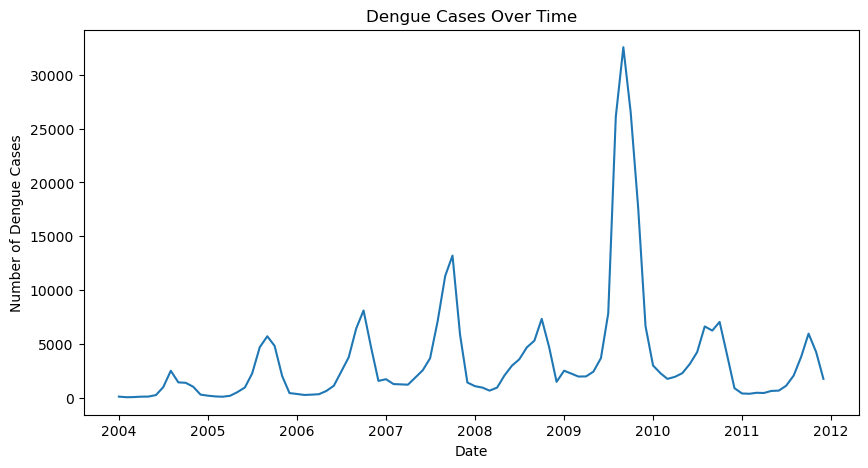

In [29]:
df = pd.read_csv('./data/MX_Dengue_trends.csv')

display(df.head())

df['Date'] = pd.to_datetime(df['Date'])

fig_a = plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Dengue CDC'])
plt.xlabel('Date')
plt.ylabel('Number of Dengue Cases')
plt.title('Dengue Cases Over Time')
plt.show()

b) For the training period 2004-2006 (36 months), find the best line that explains the number of cases of Dengue as a function of the number of searches of the term "dengue". You should do this by solving the least squares problem, and you should obtain the value of the y-intercept and the slope.

In [30]:
df_train = df.iloc[:36, :]

mod = LinearRegression()
mod.fit(df_train[['dengue']], df_train['Dengue CDC'])
m = mod.coef_[0]
b = mod.intercept_
print(f"Model: Dengue CDC = {m:.2f} * dengue + {b:.2f}")



Model: Dengue CDC = 242.62 * dengue + -1023.90


c) Use the equation of the line you obtained in (b) and plot the number of cases as a function of the number of searches of the term "dengue", predicted by your method during the training period. Compare your results to the plot in (a) for such time period.

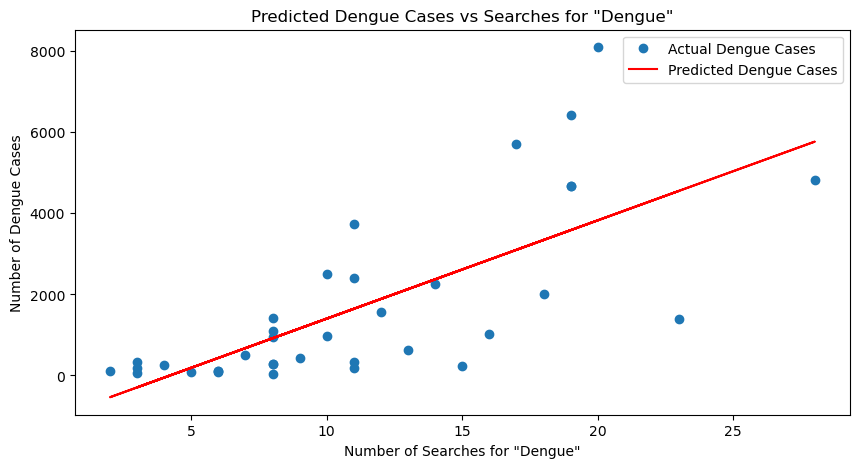

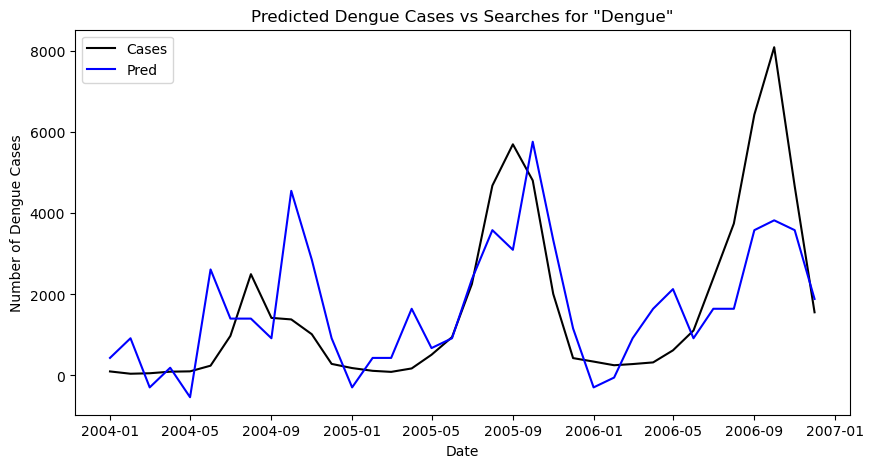

In [31]:
fig_c = plt.figure(figsize=(10, 5))
plt.plot(df_train['dengue'], df_train['Dengue CDC'], 'o', label='Actual Dengue Cases')
plt.plot(df_train['dengue'], mod.predict(df_train[['dengue']]), label='Predicted Dengue Cases', color='red')
plt.xlabel('Number of Searches for "Dengue"')
plt.ylabel('Number of Dengue Cases')
plt.title('Predicted Dengue Cases vs Searches for "Dengue"')
plt.legend()
plt.show()

pred_insample = df_train['dengue'] * m + b
fig_c = plt.figure(figsize=(10, 5))
plt.plot(df_train['Date'], df_train['Dengue CDC'], c='k', label='Cases')
plt.plot(df_train['Date'], pred_insample, c='b', label='Pred')
plt.xlabel('Date')
plt.ylabel('Number of Dengue Cases')
plt.title('Predicted Dengue Cases vs Searches for "Dengue"')
plt.legend()
plt.show()


d) For the prediction or validation period 2007-2011, use the equation of the line you obtained in
(b) to predict the number of the dengue cases as a function of the number of searches of the term "dengue" from 2007-2011. Plot your predictions and compare them to the actual number of cases.

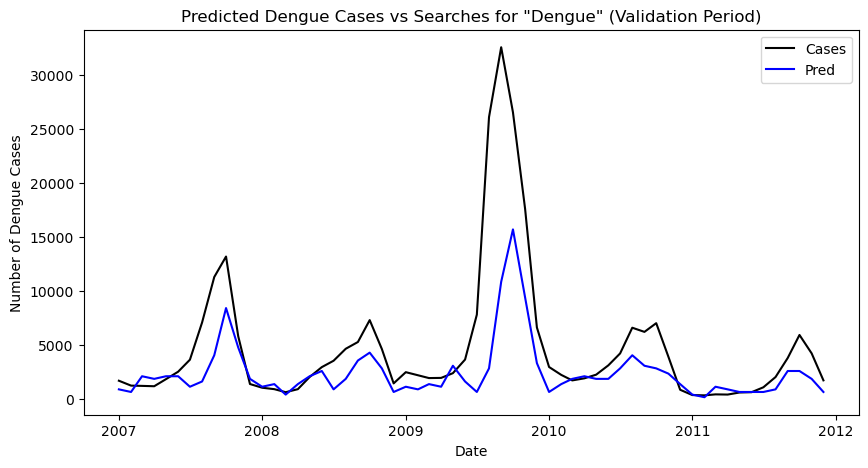

In [32]:
df_valid = df.iloc[36:, :]
pred_static = df_valid['dengue'] * m + b

fig_d = plt.figure(figsize=(10, 5))
plt.plot(df_valid['Date'], df_valid['Dengue CDC'], c='k', label='Cases')
plt.plot(df_valid['Date'], pred_static, c='b', label='Pred')
plt.xlabel('Date')  
plt.ylabel('Number of Dengue Cases')
plt.title('Predicted Dengue Cases vs Searches for "Dengue" (Validation Period)')
plt.legend()
plt.show()

### Extra: Add a lagged ground truth feature for training

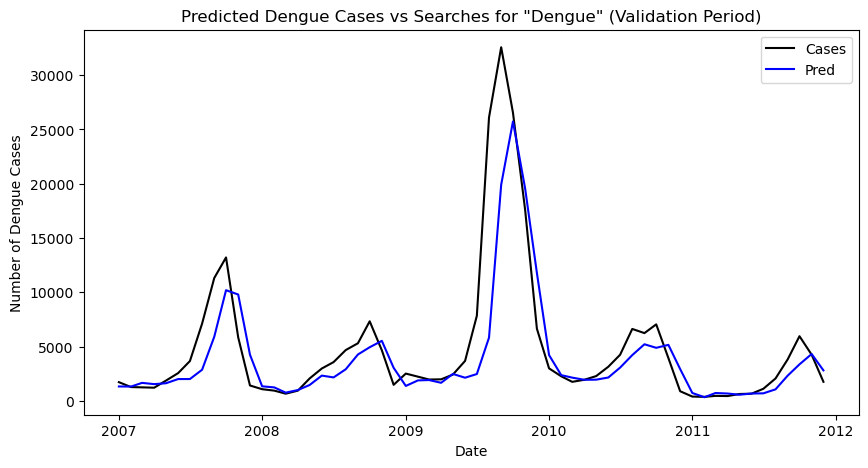

In [ ]:
df['ar1'] = df['Dengue CDC'].shift(1)

df_train = df.iloc[1:36, :]
df_valid = df.iloc[36:, :]

mod = LinearRegression()
mod.fit(df_train[['dengue', 'ar1']], df_train['Dengue CDC'])
pred_static = mod.predict(df_valid[['dengue', 'ar1']])


fig_d = plt.figure(figsize=(10, 5))
plt.plot(df_valid['Date'], df_valid['Dengue CDC'], c='k', label='Cases')
plt.plot(df_valid['Date'], pred_static, c='b', label='Pred')
plt.xlabel('Date')
plt.ylabel('Number of Dengue Cases')
plt.title('Predicted Dengue Cases vs Searches for "Dengue" (Validation Period)')
plt.legend()
plt.show()